# 🖼️ Pictures manipulation
## 🎯 Possible challenges

Libray doc [https://pillow.readthedocs.io/en/stable/](https://pillow.readthedocs.io/en/stable/index.html)

Images de work with : https://seafile.unistra.fr/d/8831e36300e64aa386ac/

- 📏 get image format and size
- 🔬 resize to create a thumbnail
- 🗃️ change format (jpg to webp)
- 🍷 change jpg quality (and threfore image size, compare)
- 📂 batch work in a folder?
- 👨🏻‍🤝‍👨🏻 spot difference between 2 pictures?
- 🌫️ blur part of picture?
- 🟩 playing with RGB channels?
- ⏹️ B&W like print (Floyd-Steinberg Dithering)
- 🌐 extract GPS informations?
- ✍️ write text on picture?
- ✍️ write pixel, lines, etc on picture?
- 🖼️ grab a screenshot?
- 🎞️ make a screenshot-timelapse?


### 📚Imports

In [2]:
# import PIL Image
from PIL import Image

### 📏 Get image size and format

In [3]:
# Get image size and format

im= Image.open('test1.jpg')
print(im.format)
print(im.size)
print(im.mode)

JPEG
(3072, 2048)
RGB


### 🔬 Create a thumbnail

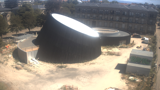

In [13]:
# Create a thmbnail

im= Image.open('test1.jpg')
resized = im.resize((160,90))
resized.save("test1_thumb.jpg")
resized

### 🗃️ Change format : exp. jpg to png 

In [14]:
# Change format : expl. jpg to png (search format in doc)

im= Image.open('test1.jpg')
im.save("test1.webp")

In [15]:
# Show file size difference in Mo
import os
print("test1.jpg", os.path.getsize("test1.jpg")/1000000)
print("test1.webp", os.path.getsize("test1.webp")/1000000)

test1.jpg 1.223144
test1.webp 0.424352


### 🍷 Change jpg quality

In [16]:
# change jpg quality (and threfore image size, compare)
img= Image.open('test1.jpg')
img.save("test1_quality1.jpg", quality=1)

### 📂 batch work in folder

In [17]:
# search all .jpg files in current folder and save them ot webp format
import os

# get all files in the folder
files = os.listdir()
print(files)

# filter the wanted files (for expl .jpg)
images=[]
for file in files:
    if '.jpg' in file:
        images.append(file)
print(images)

# do somthing with it
for image in images:
    im= Image.open(image)
    im.save(image.split(".jpg")[0]+".webp")

['foret.jpg', 'manipluatePictures.ipynb', 'readme.md', 'test.ipynb', 'test1.jpg', 'test2.jpg']
['foret.jpg', 'test1.jpg', 'test2.jpg']


### 👨🏻‍🤝‍👨🏻 spot difference between 2 pictures

In [18]:
from PIL import Image, ImageChops

im1 = Image.open("test1.jpg")
im2 = Image.open("test2.jpg")

# substract the two images
diff = ImageChops.difference(im1, im2)

# showing the difference
diff.show()
diff.save("twinDiff.jpg")

### 🌫️ blur part of picture?

In [22]:
from PIL import Image, ImageFilter

im = Image.open('test2.jpg')
# search top-left and bottom-right zone to blur with Paint for expl.
box = (564, 1230, 987, 1534)
# extract this zone
crop_img = im.crop(box)
# blur it
blur_image = crop_img.filter(ImageFilter.GaussianBlur(radius=10))
# past it back on the original picture
im.paste(blur_image, box)
im.save('test2_blured.jpg')
im.show()

### 🟩 playing with RGB channels?

In [23]:
# Let's make our picture more 50% greener

from PIL import Image

# split R, G, B channels
im=Image.open("test1.jpg")
channels = im.split()
if 1: 
    channels[0].show() # Red
    channels[1].show() # Green
    channels[2].show() # Blue

# enhance the green channel
out = channels[1].point(lambda i: int(i * 1.5))
out.show()

imFiltered = Image.merge( 'RGB', (channels[0], out, channels[2]))
imFiltered.show()

# more advanced : using masks https://pillow.readthedocs.io/en/stable/handbook/tutorial.html#point-operations

 ### ⏹️ B&W like print (Floyd-Steinberg Dithering)

In [24]:
img= Image.open('test2.jpg')
imgLight= img.convert("1") # see modes in doc "1": black or "white" only
imgLight.show()

### 🌐 extract GPS informations

In [25]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS

exif = Image.open("foret.jpg")._getexif()

# show exif metadata
print(exif)


{256: 3024, 257: 4032, 34853: {1: 'N', 2: (48.0, 13.0, 32.26), 3: 'E', 4: (7.0, 19.0, 56.7), 5: b'\x00', 6: 470.1, 7: (11.0, 15.0, 29.0), 16: 'M', 17: 200.0, 29: '2022:07:09'}, 296: 2, 34665: 243, 271: 'Google', 272: 'Pixel 3a', 305: 'HDR+ 1.0.450594208zd', 274: 1, 306: '2022:07:09 13:15:35', 531: 1, 282: 72.0, 283: 72.0, 36864: b'0232', 37121: b'\x01\x02\x03\x00', 37377: 8.96, 36867: '2022:07:09 13:15:35', 36868: '2022:07:09 13:15:35', 37378: 1.7, 37379: 6.69, 37380: 0.0, 37381: 1.7, 37382: 0.936, 37383: 2, 37385: 16, 37386: 4.44, 40961: 1, 40962: 3024, 41990: 0, 36880: '+02:00', 36881: '+02:00', 36882: '+02:00', 37520: '201', 37521: '201', 37522: '201', 40963: 4032, 41495: 2, 33434: 0.002003, 40965: 947, 33437: 1.8, 41729: b'\x01', 34850: 2, 41985: 1, 34855: 49, 41986: 0, 40960: b'0100', 41987: 0, 42035: 'Google', 42036: 'Pixel 3a back camera 4.44mm f/1.8', 41988: 2.0, 41989: 27, 41992: 0, 41993: 0, 41994: 0, 41996: 1, 42080: 3}


In [26]:
# extract GPS dictionary
print(exif[34853])

{1: 'N', 2: (48.0, 13.0, 32.26), 3: 'E', 4: (7.0, 19.0, 56.7), 5: b'\x00', 6: 470.1, 7: (11.0, 15.0, 29.0), 16: 'M', 17: 200.0, 29: '2022:07:09'}


In [27]:
# extract latitude and longitude (degrees, minutes, seconds)
# https://fr.wikihow.com/%C3%A9crire-une-latitude-et-une-longitude
latitudeText = exif[34853][1]+" "+ str(exif[34853][2][0])+" "+ str(exif[34853][2][1])+" "+ str(exif[34853][2][2])
longitudeText = exif[34853][3]+" "+ str(exif[34853][4][0])+" "+ str(exif[34853][4][1])+" "+ str(exif[34853][4][2])
print("latitude", latitudeText)
print("longitude",longitudeText)

latitude N 48.0 13.0 32.26
longitude E 7.0 19.0 56.7


In [53]:
# convert in decimal format

latitude = exif[34853][2][0] + float((exif[34853][2][1])/60) + float((exif[34853][2][2])/3600)
longitude = exif[34853][4][0] + float((exif[34853][4][1])/60) + float((exif[34853][4][2])/3600)
if exif[34853][1]=="S":
    latitude= -latitude
if exif[34853][3]=="W":
    longitude= -longitude
print(latitude, longitude)

48.22562777777778 7.332416666666666


### ✍️ write text on picture?

In [28]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

img = Image.open("foret.jpg")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", 50)
draw.text((0, 0),latitudeText +" " + longitudeText,(255,255,255),font=font)
img.show()

### ✍️ write pixels, lines, etc?

In [29]:
from PIL import Image
img = Image.new("RGB", (100, 100), (255, 255, 255))
for x in range(100):
    img.putpixel( (x, x), (0, 0, 0, 255) )
img.show()

### 🖼️ grab a screenshot?

In [1]:
from PIL import Image, ImageGrab

# grab main screen screenshot
im = ImageGrab.grab()
im.save("screenshot.png")

# grab box in a screen
bbox = (300, 300, 550, 550)
im = ImageGrab.grab(bbox)
im.show()

# grab all screens
bbox = (300, 300, 550, 550)
im = ImageGrab.grab(all_screens=True)
im.show()


### 🎞️ make a screenshot-timelapse?

In [ ]:
# same as to grab a screenshot but with a loop, time.sleep(seconds), iterating 1.jpg 2.jpg 3.jpg etc
# drag the pictures folder in a video editing software like Davinci Resolve Free edition
# or programmaticaly with FFMPEG 